In [1]:
import pandas as pd

In [67]:
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=False)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12,6)

In [245]:
#read in data
asthma_df=pd.read_csv("ukbb_asthma_sample_5k.csv",sep='\t')

In [246]:
asthma_df.columns

Index([u'Unnamed: 0', u'FID', u'IID', u'RGC_ID', u'random_normal',
       u'random_binary', u'sex', u'chip', u'PC1', u'PC2',
       ...
       u'f_40019_0_p_D40_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_male_genital_organs',
       u'f_40019_0_p_D41_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_urinary_organs',
       u'f_40019_0_p_D42_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_meninges',
       u'f_40019_0_p_D43_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_brain_and_CNS',
       u'f_40019_0_p_D44_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_endocrine_glands',
       u'f_40019_0_p_D45_CAT_Polycythaemia_vera',
       u'f_40019_0_p_D46_CAT_Myelodysplastic_syndromes',
       u'f_40019_0_p_D47_CAT_Other_neoplasms_of_uncertain_behaviour_of_lymphoid_haematopoietic',
       u'f_40019_0_p_D48_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_other_sites',
       u'f_40019_0_p_O01_CAT_Hydatidiform_mole'],
      dtype='object', length=7618)

In [130]:
#test_cols = [col for col in data_df.columns if 'HES_p' in col]

In [131]:
#data_df[test_cols]['HES_p_A02_BIN_Other_salmonella_infections']

In [ ]:
#test_df[test_cols].astype(bool).sum(axis=0).sum(axis=0)

In [ ]:
count=0
total=0

for col in test_df[test_cols].columns:
    count+=test_df[col].sum()
    total+=len(test_df[col])

print count
print float(count)/float(total)

In [272]:
#select only 'QUANTITY' fields
asthma_df_quant=asthma_df.iloc[:,asthma_df.columns.str.contains('QUANT')].fillna(0.0)

In [274]:
#select only fields with 10 or more unique values
for col in asthma_df_quant.columns:
    if len(asthma_df_quant[col].unique()) < 50 :
        print col
        asthma_df_quant.drop(col,inplace=True,axis=1)

f_20018_0_0_f_QUANT_Prospective_memory_result
f_22508_0_0_f_QUANT_Amount_of_tobacco_currently_smoked
f_1160_0_0_f_QUANT_Sleep_duration
f_1269_0_0_f_QUANT_Exposure_to_tobacco_smoke_at_home
f_1279_0_0_f_QUANT_Exposure_to_tobacco_smoke_outside_home
f_2714_0_0_f_QUANT_Age_when_periods_started_menarche
f_2867_0_0_f_QUANT_Age_started_smoking_in_former_smokers
f_2976_0_0_f_QUANT_Age_diabetes_diagnosed
f_3436_0_0_f_QUANT_Age_started_smoking_in_current_smokers
f_3536_0_0_f_QUANT_Age_started_hormone_replacement_therapy_HRT
f_3581_0_0_f_QUANT_Age_at_menopause_last_menstrual_period
f_3627_0_0_f_QUANT_Age_angina_diagnosed
f_3786_0_0_f_QUANT_Age_asthma_diagnosed
f_3829_0_0_f_QUANT_Number_of_stillbirths
f_3839_0_0_f_QUANT_Number_of_spontaneous_miscarriages
f_3882_0_0_f_QUANT_Age_at_bilateral_oophorectomy_both_ovaries_removed
f_3894_0_0_f_QUANT_Age_heart_attack_diagnosed
f_3992_0_0_f_QUANT_Age_emphysema_chronic_bronchitis_diagnosed
f_4012_0_0_f_QUANT_Age_deep_vein_thrombosis_DVT_blood_clot_in_leg_diag

In [273]:
asthma_df_quant.head()

,f_20006_0_0_f_QUANT_Interpolated_Year_when_cancer_first_diagnosed,f_20008_0_0_f_QUANT_Interpolated_Year_when_non_cancer_illness_first_diagnosed,f_20010_0_0_f_QUANT_Interpolated_Year_when_operation_took_place,f_20018_0_0_f_QUANT_Prospective_memory_result,f_22508_0_0_f_QUANT_Amount_of_tobacco_currently_smoked,f_1160_0_0_f_QUANT_Sleep_duration,f_1269_0_0_f_QUANT_Exposure_to_tobacco_smoke_at_home,f_1279_0_0_f_QUANT_Exposure_to_tobacco_smoke_outside_home,f_1807_0_0_f_QUANT_Father_s_age_at_death,f_2714_0_0_f_QUANT_Age_when_periods_started_menarche,...,specialRequest_ageSquared_QUANT_age_squared,specialRequest_QUANT_years_observed_in_primary_HES,specialRequest_QUANT_type_of_asthma_exacerbation,specialRequest_QUANT_asthma_hospital_exacerbations_raw,specialRequest_QUANT_asthma_hospital_exacerbations_annual_rate,specialRequest_QUANT_asthma_HES_based_age_of_onset,specialRequest_QUANT_asthma_HES_or_NI_based_age_of_onset_youngest,specialRequest_QUANT_OA_HES_based_age_of_onset,f_20016_20191_0_0_f_QUANT_Fluid_intelligence_score,f_4282_20240_0_0_f_QUANT_Maximum_digits_remembered_correctly
0,2004.5,0.00,1980.5,0.0,0.0,7.0,0.0,0.0,60.0,0.0,...,3969,0.134247,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0
1,0.0,2007.50,1965.5,0.0,0.0,7.0,0.0,1.0,0.0,12.0,...,2601,0.002740,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0
2,0.0,2010.23,0.0,0.0,0.0,6.0,0.0,0.0,75.0,13.0,...,3364,0.002740,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0
3,0.0,1970.88,0.0,0.0,0.0,8.0,0.0,0.0,59.0,12.0,...,4761,0.002740,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0
4,0.0,1996.17,0.0,0.0,0.0,8.0,0.0,0.0,89.0,15.0,...,4096,0.010959,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0


In [266]:
#calculate correlation matrix, take absolute value
corr_matrix=asthma_df_quant.corr().abs()
#only keep upper half of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool))
# filter to highly correlated 0.9-0.975 range
corr_var_df = upper.stack().where(lambda x: np.fabs(x) < 0.99).where(lambda x: np.fabs(x) > 0.975).dropna().sort_values(ascending=False).reset_index()
# rename data frame varialbes
corr_var_df.columns = ['Variable1','Variable2','Correlation']
corr_var_df=corr_var_df.drop_duplicates(keep='first')

In [268]:
corr_var_df.shape

(578, 3)

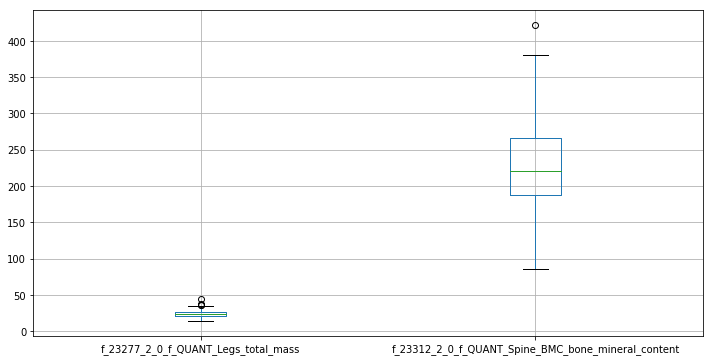

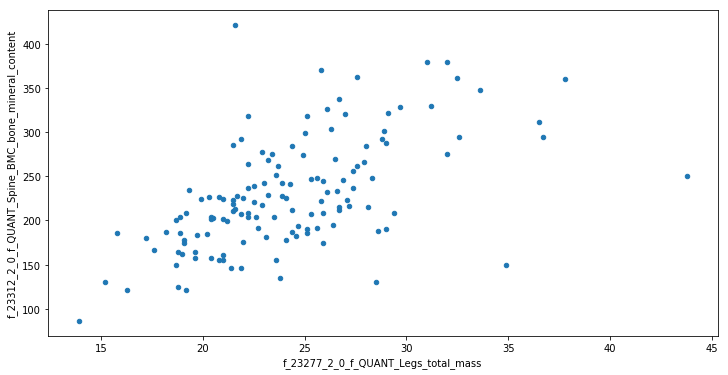

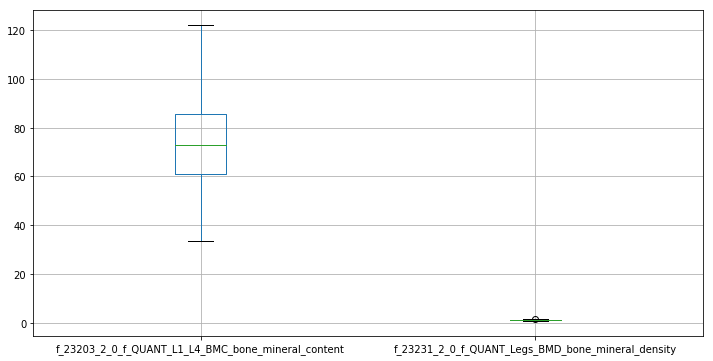

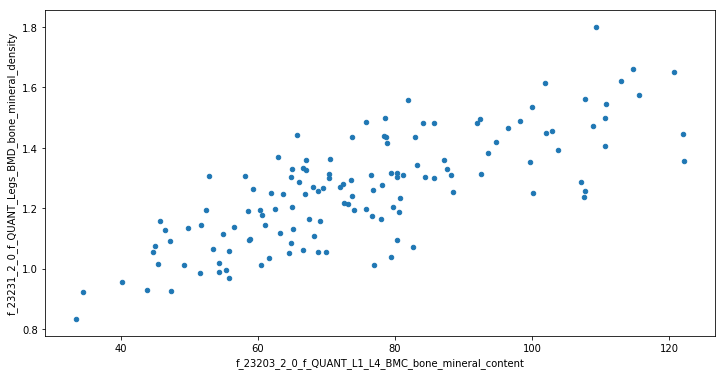

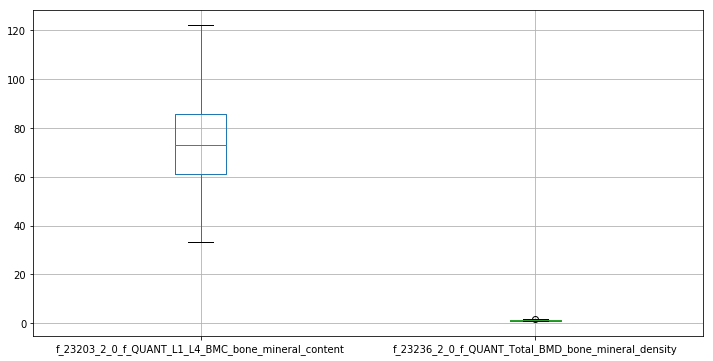

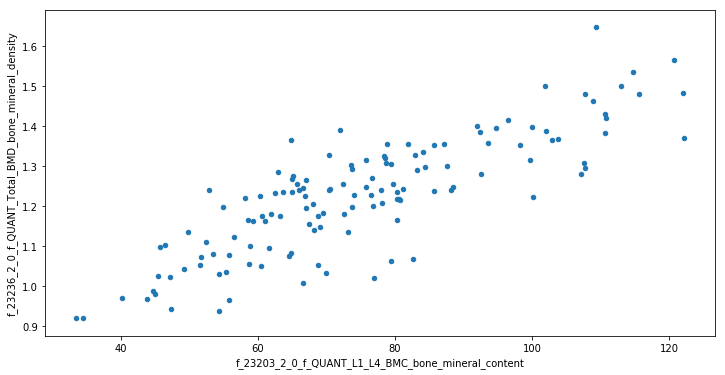

In [259]:
for i in xrange(0,3):
    boxplot=asthma_df.boxplot(column=[corr_var_df['Variable1'][i],corr_var_df['Variable2'][i]])
    scatterplot=data_df.plot.scatter(x=corr_var_df['Variable1'][i],y=corr_var_df['Variable2'][i])
    plt.show(boxplot)
    plt.show(scatterplot)